# Load Library

In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("dataset/tweets_jokowi.csv")
df.head()

,Source.Name,Tweet_count,Username,Text,Created At,Retweets,Likes
0,combined-csv.csv,1,🦉🌼Lily&Tia™😺🦉,@Tita83079013 @Menlu_RI @jokowi ternyata si Ti...,Mon Feb 05 23:59:43 +0000 2024,0,0.0
1,combined-csv.csv,2,peter hari,@Ceyung2 di PTUN gugatan kami ditolak. Masih m...,Mon Feb 05 23:59:42 +0000 2024,0,3.0
2,combined-csv.csv,3,Tempatku Menulis,"Anak jokowi aja dikasarin, apalagi pendukungny...",Mon Feb 05 23:59:37 +0000 2024,0,0.0
3,combined-csv.csv,4,adrian,@jokowi @erickthohir @bahlillahadalia masih la...,Mon Feb 05 23:59:33 +0000 2024,0,0.0
4,combined-csv.csv,5,XPRIME,@PartaiSocmed Dulu Buzzer Jokowi skrg Buzzer P...,Mon Feb 05 23:59:16 +0000 2024,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source.Name  1893 non-null   object 
 1   Tweet_count  1893 non-null   int64  
 2   Username     1893 non-null   object 
 3   Text         1893 non-null   object 
 4   Created At   1893 non-null   object 
 5   Retweets     1893 non-null   int64  
 6   Likes        1175 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 103.7+ KB


In [4]:
df = df[['Text', 'Username', 'Created At']]
df.head()

,Text,Username,Created At
0,@Tita83079013 @Menlu_RI @jokowi ternyata si Ti...,🦉🌼Lily&Tia™😺🦉,Mon Feb 05 23:59:43 +0000 2024
1,@Ceyung2 di PTUN gugatan kami ditolak. Masih m...,peter hari,Mon Feb 05 23:59:42 +0000 2024
2,"Anak jokowi aja dikasarin, apalagi pendukungny...",Tempatku Menulis,Mon Feb 05 23:59:37 +0000 2024
3,@jokowi @erickthohir @bahlillahadalia masih la...,adrian,Mon Feb 05 23:59:33 +0000 2024
4,@PartaiSocmed Dulu Buzzer Jokowi skrg Buzzer P...,XPRIME,Mon Feb 05 23:59:16 +0000 2024


# Cleaning Data

In [5]:
df.shape

(1893, 3)

In [6]:
df = df.drop_duplicates(subset=['Text'])

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Text          0
Username      0
Created At    0
dtype: int64

In [10]:
df.shape

(1893, 3)

In [11]:
# gunakan df yang berisi Text saja
df = df[['Text']]
df.head()

,Text
0,@Tita83079013 @Menlu_RI @jokowi ternyata si Ti...
1,@Ceyung2 di PTUN gugatan kami ditolak. Masih m...
2,"Anak jokowi aja dikasarin, apalagi pendukungny..."
3,@jokowi @erickthohir @bahlillahadalia masih la...
4,@PartaiSocmed Dulu Buzzer Jokowi skrg Buzzer P...


In [12]:
import re
import string

def clean_X_text(text):
    # Hapus mention, hashtag, dan retweet
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)            # Hapus hashtag
    text = re.sub(r'RT[\s]+', '', text)         # Hapus retweet
    
    # Hapus URL
    text = re.sub(r'https?://\S+', '', text)    # Hapus URL
    text = re.sub(r'http://', ' ', text)        # Hapus incomplete URL
    text = re.sub(r'https://', ' ', text)       # Hapus incomplete URL
    
    # Hapus karakter non-alphanumeric dan emoji
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Hapus karakter non-alphanumeric
    text = re.sub(r'([x#][A-Za-z0-9]+)', ' ', text)  # Hapus emoji
    
    # Hapus karakter tunggal
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    
    # Ganti tanda strip dengan spasi
    text = text.replace('-', ' ')
    
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    
    # Hapus tab dan karakter whitespace berlebih
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', '')
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    
    # Hapus titik berlebih
    text = text.replace('..', ' ')
    
    # Ubah ke huruf kecil
    text = text.lower()
    
    # Hapus tanda baca kecuali underscore
    remove = string.punctuation
    remove = remove.replace("_", "")  # Jangan hapus underscore
    pattern = r"[{}]".format(remove)  # Buat pola
    text = re.sub(pattern, "", text)
    
    return text


df['clean_text'] = df['Text'].apply(clean_X_text)

In [13]:
df['clean_text'] = df['clean_text'].str.lower()

In [14]:
df

,Text,clean_text
0,@Tita83079013 @Menlu_RI @jokowi ternyata si Ti...,ternyata si tita lebih on dari yg dikira itu g...
1,@Ceyung2 di PTUN gugatan kami ditolak. Masih m...,di ptun gugatan kami ditolak masih menyisakan ...
2,"Anak jokowi aja dikasarin, apalagi pendukungny...",anak jokowi aja dikasarin apalagi pendukungnya...
3,@jokowi @erickthohir @bahlillahadalia masih la...,masih lama ya sir kalo kita mau meeting sepert...
4,@PartaiSocmed Dulu Buzzer Jokowi skrg Buzzer P...,dulu buzzer jokowi skrg buzzer prabowosorrry y...
...,...,...
1888,"[VIDEO] Kritik Pemerintahan Jokowi, Prabowo Be...",video kritik pemerintahan jokowi prabowo bersi...
1889,[VIDEO] Rangkaian Kritik Tajam Prabowo bagi Pe...,video rangkaian kritik tajam prabowo bagi peme...
1890,Pemerintah di bawah pemerintahan Presiden Joko...,pemerintah di bawah pemerintahan presiden joko...
1891,Bantu Vote dan RT\nsilahkan jawab sejujurnya\n...,bantu vote dan silahkan jawab sejujurnyaapa me...


# Preprocessing 

## Normalisasi

In [15]:
norm = {
    " yg ": " yang ",
    " utk ": " untuk ",
    " dlm ": " dalam ",
    " krn ": " karena ",
    " dgn ": " dengan ",
    " spt ": " seperti ",
    " tdk ": " tidak ",
    " sdh ": " sudah ",
    " sy ": " saya ",
    " blm ": " belum ",
    " ttp ": " tetap ",
    " trs ": " terus ",
    " dpt ": " dapat ",
    " sm ": " sama ",
    " mrk ": " mereka ",
    " dsb ": " dan sebagainya ",
    " sblm ": " sebelum ",
    " sblmnya ": " sebelumnya ",
    " kmrn ": " kemarin ",
    " hrs ": " harus ",
    " dmn ": " dimana ",
    " ap ": " apa ",
    " aj ": " saja ",
    " br ": " baru ",
    " kpd ": " kepada ",
    " skrg ": " sekarang ",
    " ngga ": " tidak ",
    " ga ": " tidak ",
    " gk ": " tidak ",
    " knp ": " kenapa ",
    " jg ": " juga ",
    " bs ": " bisa ",
    " gmn ": " gimana ",
    " lbh ": " lebih ",
    " bgmn ": " bagaimana ",
    " drpd ": " daripada ",
    " cm ": " cuma ",
    " cmn ": " cuma ",
    " km ": " kamu ",
    " lg ": " lagi ",
    " sj ": " saja ",
    " ya ": " iya ",
    " ga ": " tidak ",
    " ngak ": " tidak ",
    " mantab ": " keren "
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['normalize_text'] = df['clean_text'].apply(lambda x:normalisasi(x))
df

,Text,clean_text,normalize_text
0,@Tita83079013 @Menlu_RI @jokowi ternyata si Ti...,ternyata si tita lebih on dari yg dikira itu g...,ternyata si tita lebih on dari yang dikira itu...
1,@Ceyung2 di PTUN gugatan kami ditolak. Masih m...,di ptun gugatan kami ditolak masih menyisakan ...,di ptun gugatan kami ditolak masih menyisakan ...
2,"Anak jokowi aja dikasarin, apalagi pendukungny...",anak jokowi aja dikasarin apalagi pendukungnya...,anak jokowi aja dikasarin apalagi pendukungnya...
3,@jokowi @erickthohir @bahlillahadalia masih la...,masih lama ya sir kalo kita mau meeting sepert...,masih lama iya sir kalo kita mau meeting seper...
4,@PartaiSocmed Dulu Buzzer Jokowi skrg Buzzer P...,dulu buzzer jokowi skrg buzzer prabowosorrry y...,dulu buzzer jokowi sekarang buzzer prabowosorr...
...,...,...,...
1888,"[VIDEO] Kritik Pemerintahan Jokowi, Prabowo Be...",video kritik pemerintahan jokowi prabowo bersi...,video kritik pemerintahan jokowi prabowo bersi...
1889,[VIDEO] Rangkaian Kritik Tajam Prabowo bagi Pe...,video rangkaian kritik tajam prabowo bagi peme...,video rangkaian kritik tajam prabowo bagi peme...
1890,Pemerintah di bawah pemerintahan Presiden Joko...,pemerintah di bawah pemerintahan presiden joko...,pemerintah di bawah pemerintahan presiden joko...
1891,Bantu Vote dan RT\nsilahkan jawab sejujurnya\n...,bantu vote dan silahkan jawab sejujurnyaapa me...,bantu vote dan silahkan jawab sejujurnyaapa me...


## Stopword

In [16]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_word = StopWordRemoverFactory().get_stop_words()
stop_word.extend(more_stop_words)

new_array = ArrayDictionary(stop_word)
stop_word_remover_new  = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_word_remover_new.remove(str_text)
    return str_text

df['stopword_text'] = df['normalize_text'].apply(lambda x: stopword(x))
df.head()

,Text,clean_text,normalize_text,stopword_text
0,@Tita83079013 @Menlu_RI @jokowi ternyata si Ti...,ternyata si tita lebih on dari yg dikira itu g...,ternyata si tita lebih on dari yang dikira itu...,ternyata si tita lebih on yang dikira guru min...
1,@Ceyung2 di PTUN gugatan kami ditolak. Masih m...,di ptun gugatan kami ditolak masih menyisakan ...,di ptun gugatan kami ditolak masih menyisakan ...,ptun gugatan ditolak menyisakan gugatan perdat...
2,"Anak jokowi aja dikasarin, apalagi pendukungny...",anak jokowi aja dikasarin apalagi pendukungnya...,anak jokowi aja dikasarin apalagi pendukungnya...,anak jokowi aja dikasarin pendukungnya lainoga...
3,@jokowi @erickthohir @bahlillahadalia masih la...,masih lama ya sir kalo kita mau meeting sepert...,masih lama iya sir kalo kita mau meeting seper...,lama iya sir kalo mau meeting ini padahal udah...
4,@PartaiSocmed Dulu Buzzer Jokowi skrg Buzzer P...,dulu buzzer jokowi skrg buzzer prabowosorrry y...,dulu buzzer jokowi sekarang buzzer prabowosorr...,dulu buzzer jokowi sekarang buzzer prabowosorr...


## Tokenize

In [18]:
tokenized = df['stopword_text'].apply(lambda x:x.split())
tokenized

0       [ternyata, si, tita, lebih, on, yang, dikira, ...
1       [ptun, gugatan, ditolak, menyisakan, gugatan, ...
2       [anak, jokowi, aja, dikasarin, pendukungnya, l...
3       [lama, iya, sir, kalo, mau, meeting, ini, pada...
4       [dulu, buzzer, jokowi, sekarang, buzzer, prabo...
                              ...                        
1888    [video, kritik, pemerintahan, jokowi, prabowo,...
1889    [video, rangkaian, kritik, tajam, prabowo, pem...
1890    [pemerintah, bawah, pemerintahan, presiden, jo...
1891    [bantu, vote, silahkan, jawab, sejujurnyaapa, ...
1892    [mas, sangat, tahu, nasib, ta, dipaksakan, pem...
Name: stopword_text, Length: 1893, dtype: object

## Stemming

In [17]:
# untuk mengubah kata berimbuhan menjadi kata dasar

In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

#backup data tokenized
tokenized.to_csv("hasilPreprocessingJokowi", index=False)

nyata si tita lebih on yang kira guru minta maaf sesal tarik katanyawalau si guru buzzerzionis sukarela lebih ksatria onnya tidak sembunyi balik akun bodong
ptun gugat tolak sisa gugat perdata pn jakpus milu sidang gelar selain lawan kpu lawan jokowi dng kaca otto hasibuan beberapa pihak uji materi ma kuat kalau gugat maklum pasien cuci darah
anak jokowi aja dikasarin dukung lainogah ah pilih begini
lama iya sir kalo mau meeting ini padahal udah banyak kalau indonesia rapat kabinet begini mungkin seluruh dunia langsung percaya mampu tkw arab saudi bisa lepas kangen anak indonesia
dulu buzzer jokowi sekarang buzzer prabowosorrry yeee rakyat ken ubah
tuntut adil rakyat kalo timnas tpn turun kamis bikin citra perintah atas buat nyerang personal kan khawatir akan bumerang kaya jokowi bikin janji periode adil malah ngajak prabowo perintah
yaa harus pembeci jokowi dong nyata kelasnnya cuma remeh temeh aja si deyang
rg ngajarin orang pilih pake otak bukan gara gara cuma kasih jaket blt jokowi

In [4]:
data = pd.read_csv("hasilPreprocessingJokowi", encoding='latin1')

In [5]:
data

,stopword_text
0,nyata si tita lebih on yang kira guru minta ma...
1,ptun gugat tolak sisa gugat perdata pn jakpus ...
2,anak jokowi aja dikasarin dukung lainogah ah p...
3,lama iya sir kalo mau meeting ini padahal udah...
4,dulu buzzer jokowi sekarang buzzer prabowosorr...
...,...
1888,video kritik perintah jokowi prabowo siap maju...
1889,video rangkai kritik tajam prabowo perintah jo...
1890,perintah bawah perintah presiden jokowi hasil ...
1891,bantu vote silah jawab sejujurnyaapa anda kemb...


In [6]:
data.rename(columns={"stopword_text": "Text"}, inplace=True)
data

,Text
0,nyata si tita lebih on yang kira guru minta ma...
1,ptun gugat tolak sisa gugat perdata pn jakpus ...
2,anak jokowi aja dikasarin dukung lainogah ah p...
3,lama iya sir kalo mau meeting ini padahal udah...
4,dulu buzzer jokowi sekarang buzzer prabowosorr...
...,...
1888,video kritik perintah jokowi prabowo siap maju...
1889,video rangkai kritik tajam prabowo perintah jo...
1890,perintah bawah perintah presiden jokowi hasil ...
1891,bantu vote silah jawab sejujurnyaapa anda kemb...


## Translate

In [22]:
data.head()

,Text
0,nyata si tita lebih on yang kira guru minta ma...
1,ptun gugat tolak sisa gugat perdata pn jakpus ...
2,anak jokowi aja dikasarin dukung lainogah ah p...
3,lama iya sir kalo mau meeting ini padahal udah...
4,dulu buzzer jokowi sekarang buzzer prabowosorr...


In [12]:
from deep_translator import GoogleTranslator

def convert_eng(tweet):
    translator = GoogleTranslator(source='id', target='en')
    try:
        translation = translator.translate(tweet)
        return translation
    except Exception as e:
        print(f"Error translating tweet: {tweet}. Error: {e}")
        return tweet  # Return original tweet if translation fails

data['text_english'] = data['Text'].apply(convert_eng)
data.to_csv("terjemahanJokowi.csv", index=False)

# Display the DataFrame to ensure it has been translated correctly
print(data)

                                                   Text klasifikasi  \
0     nyata si tita lebih on yang kira guru minta ma...      Netral   
1     ptun gugat tolak sisa gugat perdata pn jakpus ...      Netral   
2     anak jokowi aja dikasarin dukung lainogah ah p...      Netral   
3     lama iya sir kalo mau meeting ini padahal udah...      Netral   
4     dulu buzzer jokowi sekarang buzzer prabowosorr...      Netral   
...                                                 ...         ...   
1888  video kritik perintah jokowi prabowo siap maju...      Netral   
1889  video rangkai kritik tajam prabowo perintah jo...      Netral   
1890  perintah bawah perintah presiden jokowi hasil ...      Netral   
1891  bantu vote silah jawab sejujurnyaapa anda kemb...      Netral   
1892  mas sangat tahu nasib ta paksa perintah milik ...      Netral   

                                           text_english  
0     It's true that Tita is more online, which is t...  
1     ptun sues rejects remaini

In [30]:
data = pd.read_csv("terjemahanJokowi.csv", encoding='latin1')
data.head()

,Text,text_english
0,nyata si tita lebih on yang kira guru minta ma...,"It's true that Tita is more online, which is t..."
1,ptun gugat tolak sisa gugat perdata pn jakpus ...,ptun sues rejects remaining civil lawsuit pn j...
2,anak jokowi aja dikasarin dukung lainogah ah p...,"Even if Jokowi's children are rude, support ot..."
3,lama iya sir kalo mau meeting ini padahal udah...,"It's been a long time, sir, if you want to hav..."
4,dulu buzzer jokowi sekarang buzzer prabowosorr...,"Previously Jokowi's buzzer, now Prabowo's buzz..."


# Labeling

In [7]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [36]:
data_tweet = list(data["Text"])
polaritas = 0

status_before = []
total_positif_before = total_negatif_before = total_netral_before = total_before = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity
    
    if analysis.sentiment.polarity > 0.0:
        total_positif_before += 1
        status_before.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral_before += 1
        status_before.append("Netral")
    else: 
        total_negatif_before += 1
        status_before.append("Negatif")
    
    total_before += 1

print(f"Hasil Analisis Sebelum Translation Data:\nPositif = {total_positif_before}\nNetral = {total_netral_before}\nNegatif = {total_negatif_before}")
print(f"\nTotal Data : {total_before}")

Hasil Analisis Sebelum Translation Data:
Positif = 71
Netral = 1775
Negatif = 47

Total Data : 1893


In [37]:
data_tweet = list(data["text_english"])
polaritas = 0

status_after = []
total_positif_after = total_negatif_after = total_netral_after = total_after = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity
    
    if analysis.sentiment.polarity > 0.0:
        total_positif_after += 1
        status_after.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral_after += 1
        status_after.append("Netral")
    else: 
        total_negatif_after += 1
        status_after.append("Negatif")
    
    total_after += 1

print(f"Hasil Analisis Sesudah Translation Data:\nPositif = {total_positif_after}\nNetral = {total_netral_after}\nNegatif = {total_negatif_after}")
print(f"\nTotal Data : {total_after}")

Hasil Analisis Sesudah Translation Data:
Positif = 974
Netral = 510
Negatif = 409

Total Data : 1893


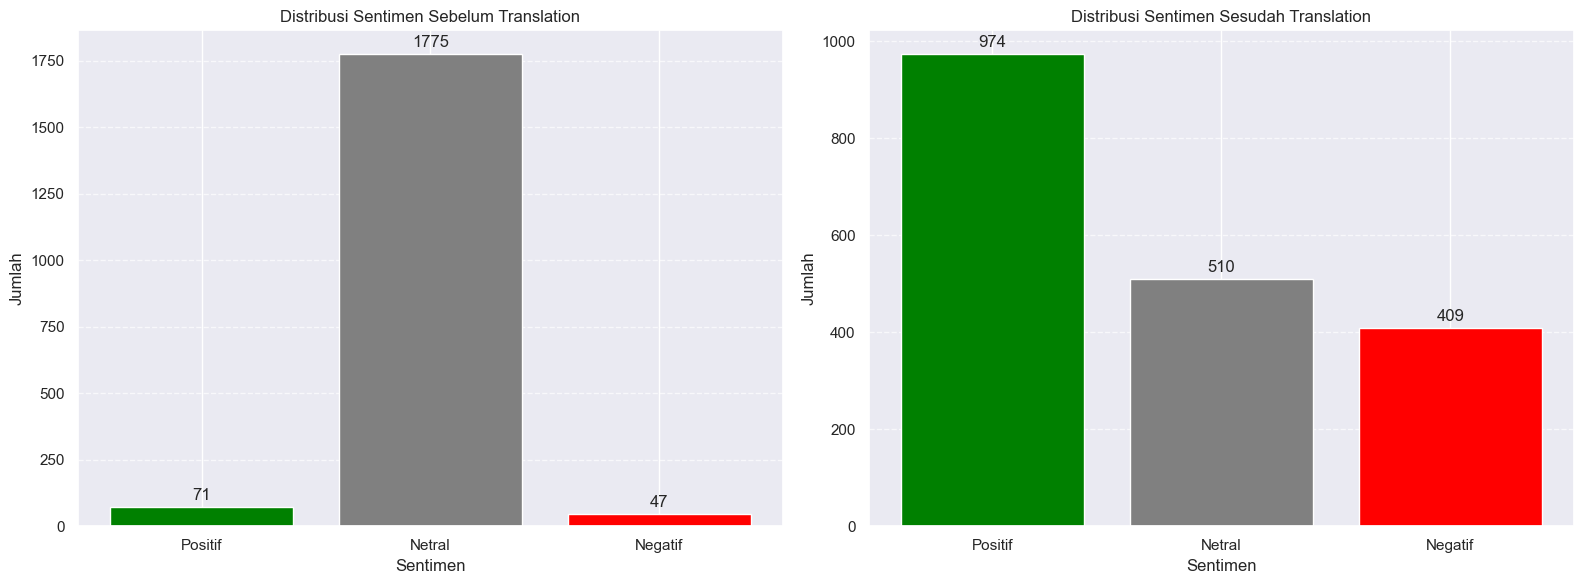

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting tema visualisasi
sns.set_theme()

# Label dan count untuk sebelum translasi
labels = ['Positif', 'Netral', 'Negatif']
counts_before = [total_positif_before, total_netral_before, total_negatif_before]

# Label dan count untuk sesudah translasi
counts_after = [total_positif_after, total_netral_after, total_negatif_after]

# Warna yang sesuai dengan makna sentimen
colors = ['green', 'gray', 'red']

# Membuat subplots dengan dua sumbu
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart untuk sebelum translasi
bars_before = ax[0].bar(labels, counts_before, color=colors)
ax[0].set_title('Distribusi Sentimen Sebelum Translation')
ax[0].set_xlabel('Sentimen')
ax[0].set_ylabel('Jumlah')

# Menambahkan anotasi untuk bar chart sebelum translasi
for bar, count in zip(bars_before, counts_before):
    height = bar.get_height()
    ax[0].annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom')

# Bar chart untuk sesudah translasi
bars_after = ax[1].bar(labels, counts_after, color=colors)
ax[1].set_title('Distribusi Sentimen Sesudah Translation')
ax[1].set_xlabel('Sentimen')
ax[1].set_ylabel('Jumlah')

# Menambahkan anotasi untuk bar chart sesudah translasi
for bar, count in zip(bars_after, counts_after):
    height = bar.get_height()
    ax[1].annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom')

# Menambahkan grid ke kedua subplots
for a in ax:
    a.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


Dalam analisis sentimen ini, penggunaan bahasa Inggris memberikan hasil yang lebih konsisten dan akurat daripada bahasa Indoensia. Hal ini terlihat dari jumlah status netral yang lebih rendah setelah translasi, menunjukkan bahwa model dapat lebih efektif membedakan nuansa sentimen yang sebenarnya. Dengan bahasa Inggris yang lebih umum digunakan dalam model analisis, kita dapat mengurangi ambiguitas dan meningkatkan presisi dalam interpretasi sentimen.

In [41]:
data["klasifikasi"] = status_after
data

,Text,text_english,klasifikasi
0,nyata si tita lebih on yang kira guru minta ma...,"It's true that Tita is more online, which is t...",Positif
1,ptun gugat tolak sisa gugat perdata pn jakpus ...,ptun sues rejects remaining civil lawsuit pn j...,Positif
2,anak jokowi aja dikasarin dukung lainogah ah p...,"Even if Jokowi's children are rude, support ot...",Negatif
3,lama iya sir kalo mau meeting ini padahal udah...,"It's been a long time, sir, if you want to hav...",Positif
4,dulu buzzer jokowi sekarang buzzer prabowosorr...,"Previously Jokowi's buzzer, now Prabowo's buzz...",Negatif
...,...,...,...
1888,video kritik perintah jokowi prabowo siap maju...,video criticizing jokowi's order prabowo ready...,Positif
1889,video rangkai kritik tajam prabowo perintah jo...,video series of sharp criticisms of Prabowo an...,Negatif
1890,perintah bawah perintah presiden jokowi hasil ...,"President Jokowi's orders, the results of the ...",Positif
1891,bantu vote silah jawab sejujurnyaapa anda kemb...,help vote please answer honestly are you growi...,Positif


# Visualisasi

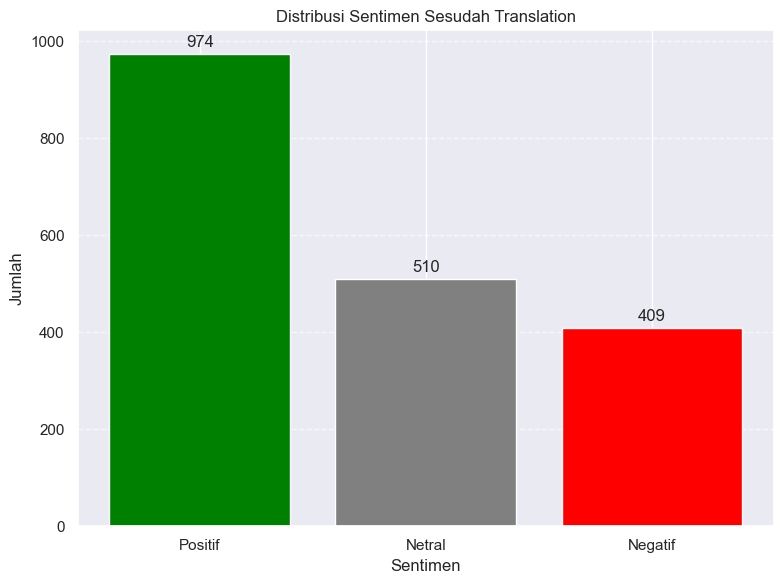

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting tema visualisasi
sns.set_theme()

# Label dan count untuk sesudah translasi
labels = ['Positif', 'Netral', 'Negatif']
counts_after = [total_positif_after, total_netral_after, total_negatif_after]

# Warna yang sesuai dengan makna sentimen
colors = ['green', 'gray', 'red']

# Membuat plot
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart untuk sesudah translasi
bars_after = ax.bar(labels, counts_after, color=colors)
ax.set_title('Distribusi Sentimen Sesudah Translation')
ax.set_xlabel('Sentimen')
ax.set_ylabel('Jumlah')

# Menambahkan anotasi untuk bar chart sesudah translasi
for bar, count in zip(bars_after, counts_after):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Menambahkan grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


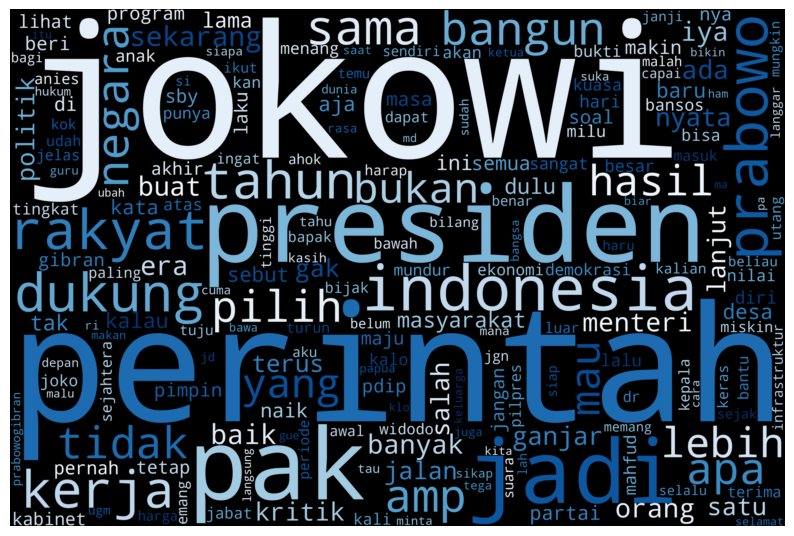

In [42]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
all_words = ' '.join([tweets for tweets in data['Text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

# Klasifikasi Sentimen

In [52]:
import pandas as pd
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from textblob import TextBlob

# Mengonversi kolom teks dan sentimen ke dalam format yang sesuai untuk NaiveBayesClassifier
train_data = list(zip(data['Text'], data['klasifikasi']))

# Membagi data menjadi data latih dan data uji
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)


In [53]:
# Membuat dan melatih model NaiveBayesClassifier
classifier = NaiveBayesClassifier(train_data)

In [54]:
from sklearn.metrics import classification_report

# Menyiapkan data uji
test_texts = [text for text, _ in test_data]
test_labels = [label for _, label in test_data]

# Prediksi pada data uji
predictions = [classifier.classify(text) for text in test_texts]

# Menghitung akurasi dan membuat laporan klasifikasi
print(f"Accuracy: {sum(p == l for p, l in zip(predictions, test_labels)) / len(test_labels)}")
print(classification_report(test_labels, predictions, target_names=['Negatif', 'Netral', 'Positif']))


Accuracy: 0.6179577464788732
              precision    recall  f1-score   support

     Negatif       0.35      0.12      0.17       112
      Netral       0.63      0.64      0.64       166
     Positif       0.64      0.80      0.71       290

    accuracy                           0.62       568
   macro avg       0.54      0.52      0.51       568
weighted avg       0.58      0.62      0.58       568

